In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
soln= pd.read_csv('solution_template.csv')

In [5]:
train.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,...,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,...,49.30,72.87,77.40,77.43,75.83,72.64,58.36,39.68,39.71,33
2,277055,NaN,COMMERCIAL,CA,925,West,Pacific,59,F,NaN,...,68.50,70.31,78.61,87.24,85.52,80.75,70.81,62.67,55.58,157
3,320055,Hispanic,MEDICAID,CA,900,West,Pacific,59,F,NaN,...,63.34,63.10,67.45,75.86,75.24,71.10,68.95,65.46,59.46,146
4,190386,NaN,COMMERCIAL,CA,934,West,Pacific,71,F,NaN,...,59.45,60.24,64.77,69.81,70.13,68.10,65.38,60.72,54.08,286


In [7]:
test.head(5)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,...,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,...,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,...,48.63,58.14,77.26,80.05,82.88,82.09,78.85,64.60,50.57,48.10
2,571362,NaN,COMMERCIAL,TX,794,South,West South Central,54,F,32.33,...,57.82,59.95,77.79,82.45,82.44,80.77,72.16,59.31,48.25,42.13
3,907331,NaN,COMMERCIAL,TN,373,South,East South Central,63,F,27.07,...,47.57,53.50,71.31,75.20,76.96,75.78,74.87,61.06,44.31,42.83
4,208382,Asian,NaN,WA,980,West,Pacific,62,F,NaN,...,41.02,46.25,56.92,57.88,66.16,65.21,57.52,49.53,43.75,38.33


In [9]:
print(train.shape)
print(test.shape)

(13173, 152)
(5646, 151)


In [11]:
train_columns = set(train.columns)
test_columns = set(test.columns)
train_columns - test_columns
#as expected, the target variable is missing from the test set

{'metastatic_diagnosis_period'}

In [13]:
missing_count = train.isna().sum()

In [15]:
#let's see percentage missing
missing_count[missing_count > 0].sort_values(ascending=False)
#data has 13173 rows, the metastatic columns have so much missing data so drop them

metastatic_first_novel_treatment         13162
metastatic_first_novel_treatment_type    13162
bmi                                       9071
patient_race                              6657
payer_type                                1765
                                         ...  
Average of Nov-16                            3
Average of Feb-13                            3
Average of May-13                            3
Average of Nov-13                            3
Average of Jun-17                            1
Length: 72, dtype: int64

In [17]:
train= train.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','breast_cancer_diagnosis_desc'], axis=1)
test= test.drop(['metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','breast_cancer_diagnosis_desc'], axis=1)


In [19]:
#check for dupes
print(train.duplicated().sum())
print(train.duplicated().sum())

0
0


In [20]:
train.columns

Index(['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'Region', 'Division', 'patient_age', 'patient_gender',
       'bmi',
       ...
       'Average of Apr-18', 'Average of May-18', 'Average of Jun-18',
       'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18',
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'metastatic_diagnosis_period'],
      dtype='object', length=149)

In [22]:
train.isna().sum().sort_values()

patient_id              0
Average of Jul-13       0
Average of Apr-13       0
Average of Mar-13       0
veteran                 0
                     ... 
Average of Jun-14     152
Average of Apr-14     180
payer_type           1765
patient_race         6657
bmi                  9071
Length: 149, dtype: int64

In [23]:
#if race is null, make it other
train['patient_race']=train['patient_race'].replace(np.nan, 'Other')
test['patient_race']=test['patient_race'].replace(np.nan, 'Other')

#if payer type is null, make it other
train['payer_type']=train['payer_type'].replace(np.nan, 'Other')
test['payer_type']=test['payer_type'].replace(np.nan, 'Other')


In [24]:
#if bmi is null, replace with mean
train['bmi']=train['bmi'].fillna(train['bmi'].mean())
test['bmi']=test['bmi'].fillna(test['bmi'].mean())


#same for average columns
average_columns = [col for col in train.columns if col.startswith('Average')]
train[average_columns] = train[average_columns].fillna(train[average_columns].mean())

test_average_columns = [col for col in test.columns if col.startswith('Average')]
test[test_average_columns] = test[test_average_columns].fillna(test[test_average_columns].mean())

In [25]:
#check other cols with nas. They are mostly numeric so use mean
cols_with_nas=train.columns[train.isna().sum() >0].tolist()

train[cols_with_nas]= train[cols_with_nas].fillna(train[cols_with_nas].mean())
test[cols_with_nas]=test[cols_with_nas].fillna(test[cols_with_nas].mean())

In [26]:
train.dtypes

patient_id                       int64
patient_race                    object
payer_type                      object
patient_state                   object
patient_zip3                     int64
                                ...   
Average of Sep-18              float64
Average of Oct-18              float64
Average of Nov-18              float64
Average of Dec-18              float64
metastatic_diagnosis_period      int64
Length: 149, dtype: object

In [33]:
#all patients are female so drop that column.
train.groupby('patient_gender').size() #so let's not worry about gender
train=train.drop(['patient_gender'], axis=1)
test=test.drop(['patient_gender'], axis=1)

In [34]:
#let's understand the metastatic diagnosis period
train['metastatic_diagnosis_period'].describe()
#so it is between 0 and 365 days with a mean of 96 days

count    13173.000000
mean        96.515221
std        108.969873
min          0.000000
25%          3.000000
50%         44.000000
75%        181.000000
max        365.000000
Name: metastatic_diagnosis_period, dtype: float64

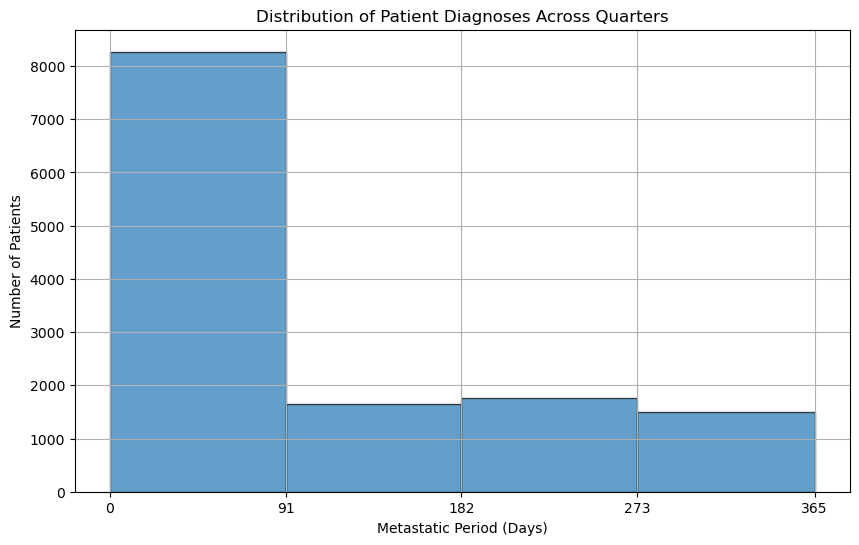

In [36]:
#let's divide this period into 4
bins = [0, 91, 182, 273, 365]  # Assuming each quarter has approximately 91 days

# Create a histogram of metastatic period with quarters
plt.figure(figsize=(10, 6))
plt.hist(train['metastatic_diagnosis_period'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Metastatic Period (Days)')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patient Diagnoses Across Quarters')
plt.xticks(bins)
plt.grid(True)
plt.show()
#so most patients are diagnosed within the first 3 months. How does this change with age, race?

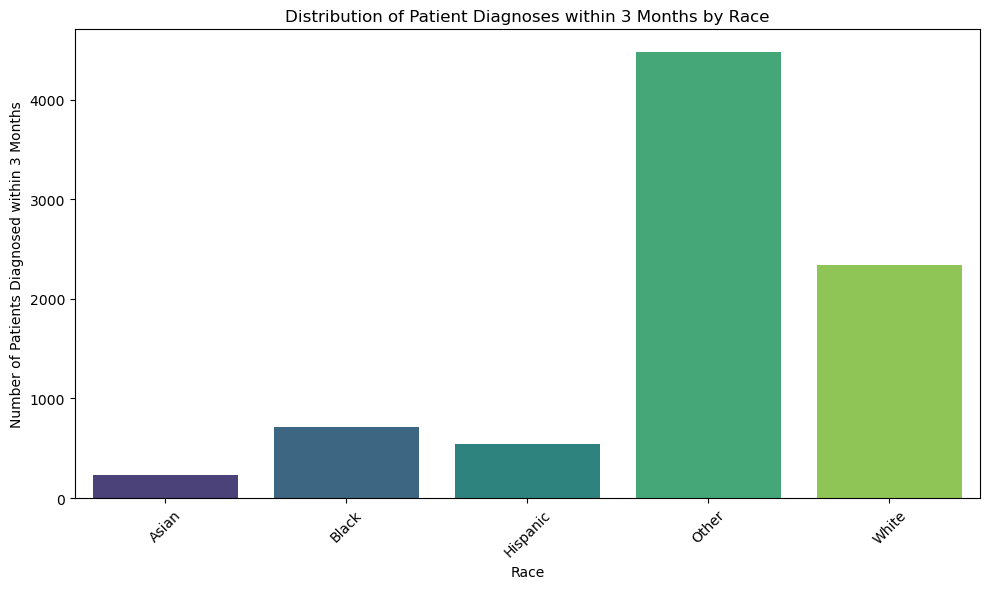

In [37]:
# Filter the data for patients diagnosed within the first 3 months
diagnosed_within_3_months = train[train['metastatic_diagnosis_period'] <= 91]

# Count the number of patients diagnosed within the first 3 months by race
diagnosed_within_3_months_by_race = diagnosed_within_3_months.groupby('patient_race').size().reset_index(name='count')

# Plot the distribution of patient diagnoses within the first 3 months by race
plt.figure(figsize=(10, 6))
sns.barplot(x='patient_race', y='count', data=diagnosed_within_3_months_by_race, palette='viridis')
plt.xlabel('Race')
plt.ylabel('Number of Patients Diagnosed within 3 Months')
plt.title('Distribution of Patient Diagnoses within 3 Months by Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#More other and White races are diagnosed most within the first 3 months. Does this hold for within 273-365 days? 

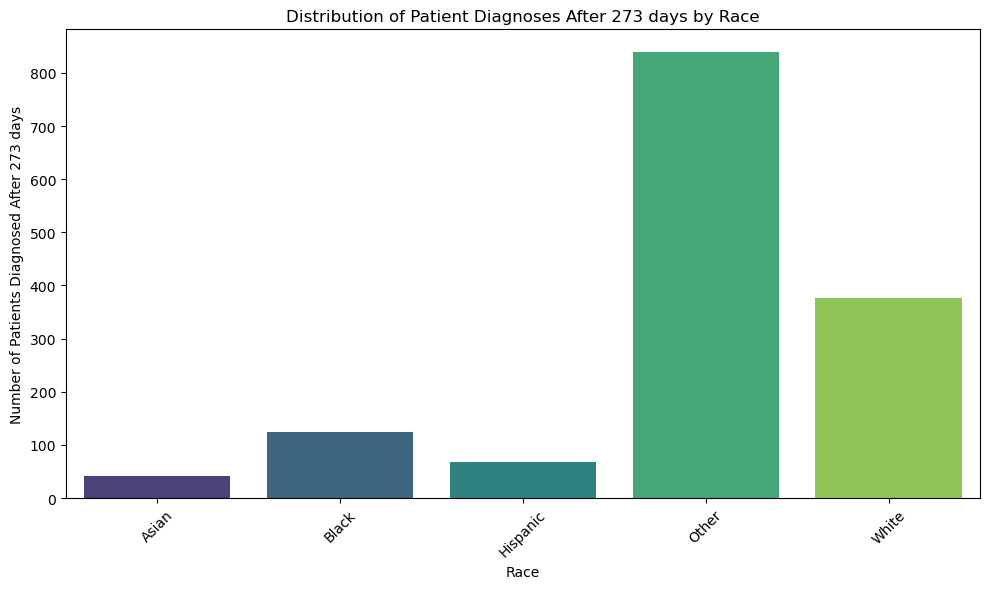

In [39]:
# Filter the data for patients diagnosed after 273 days
diagnosed_after_273_months = train[train['metastatic_diagnosis_period'] > 273]

# Count the number of patients diagnosed within the first 3 months by race
diagnosed_after_273_months_by_race = diagnosed_after_273_months.groupby('patient_race').size().reset_index(name='count')

# Plot the distribution of patient diagnoses within the first 3 months by race
plt.figure(figsize=(10, 6))
sns.barplot(x='patient_race', y='count', data=diagnosed_after_273_months_by_race, palette='viridis')
plt.xlabel('Race')
plt.ylabel('Number of Patients Diagnosed After 273 days')
plt.title('Distribution of Patient Diagnoses After 273 days by Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Yes it does hold!

/var/folders/mf/0548xxq13yx89ndd707qq4bw0000gn/T/ipykernel_20850/3255494629.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train['time_interval'] = train['metastatic_diagnosis_period'].apply(categorize_period)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

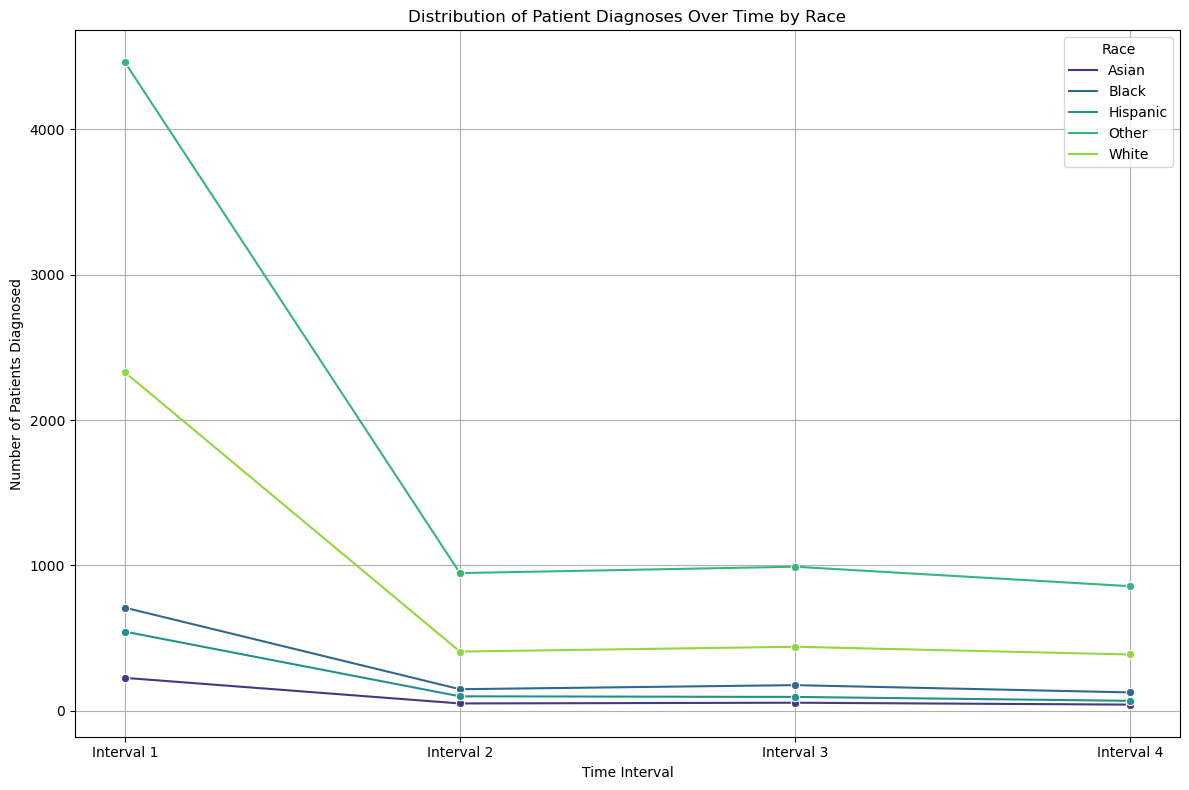

In [40]:
#let's visualize race across all time intervals into one chart 
#Define time intervals (e.g., every 30 days)
time_intervals = [(0, 91), (91, 182), (182, 273), (273, 365)]  # in days

# Categorize patients based on their metastatic period into time intervals
def categorize_period(period):
    for i, (start, end) in enumerate(time_intervals):
        if start <= period < end:
            return f"Interval {i+1}"

# Apply categorization to create a new column 'time_interval'
train['time_interval'] = train['metastatic_diagnosis_period'].apply(categorize_period)

# Count the number of patients within each time interval and race
diagnosis_by_time_and_race = train.groupby(['time_interval', 'patient_race']).size().reset_index(name='count')

# Plot the distribution of patient diagnoses over time by race
plt.figure(figsize=(12, 8))
sns.lineplot(x='time_interval', y='count', hue='patient_race', data=diagnosis_by_time_and_race, marker='o', palette='viridis')
plt.xlabel('Time Interval')
plt.ylabel('Number of Patients Diagnosed')
plt.title('Distribution of Patient Diagnoses Over Time by Race')
plt.legend(title='Race')
plt.grid(True)
plt.xticks(ticks=range(len(time_intervals)), labels=[f'Interval {i+1}' for i in range(len(time_intervals))])
plt.tight_layout()
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 l

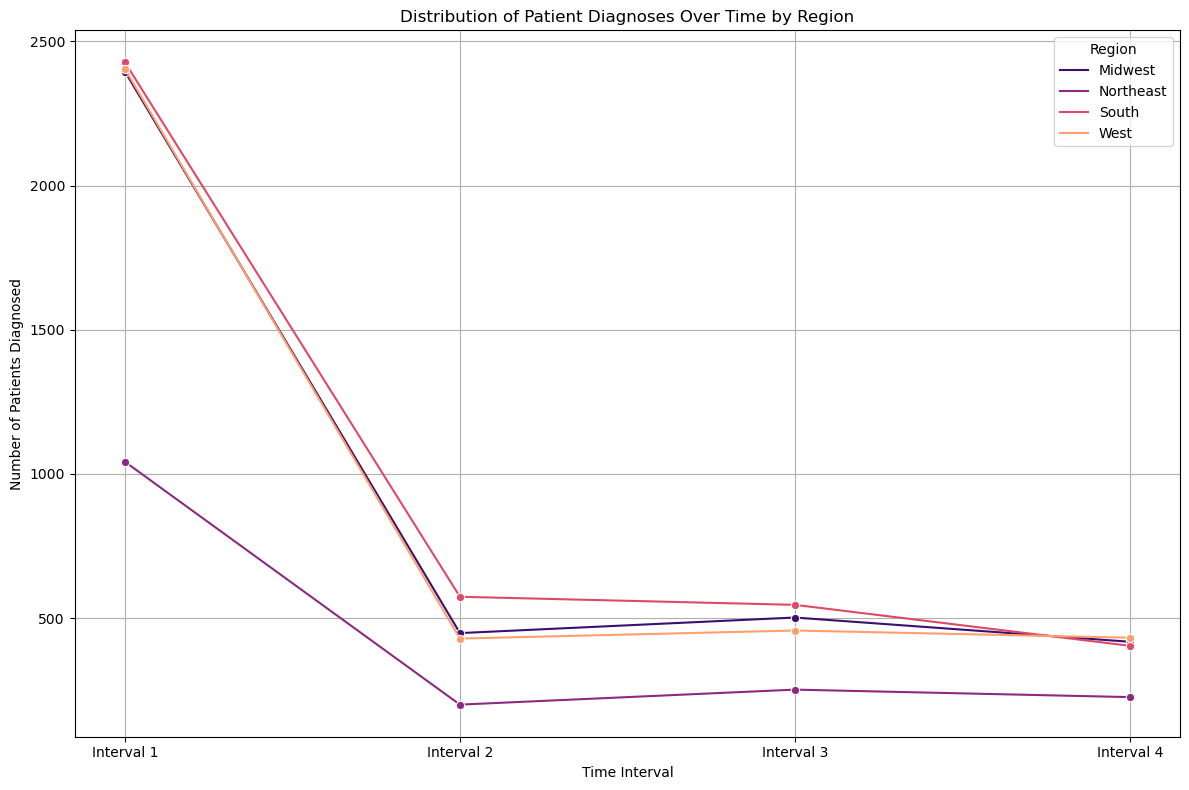

In [41]:
# let's visualize region as well across all time intervals in one chart
time_intervals = [(0, 91), (91, 182), (182, 273), (273, 365)]  # in days

# Categorize patients based on their metastatic period into time intervals
def categorize_period(period):
    for i, (start, end) in enumerate(time_intervals):
        if start <= period < end:
            return f"Interval {i+1}"

# Apply categorization to create a new column 'time_interval'
train['time_interval'] = train['metastatic_diagnosis_period'].apply(categorize_period)

# Count the number of patients within each time interval and race
diagnosis_by_time_and_region = train.groupby(['time_interval', 'Region']).size().reset_index(name='count')

# Plot the distribution of patient diagnoses over time by region
plt.figure(figsize=(12, 8))
sns.lineplot(x='time_interval', y='count', hue='Region', data=diagnosis_by_time_and_region, marker='o', palette='magma')
plt.xlabel('Time Interval')
plt.ylabel('Number of Patients Diagnosed')
plt.title('Distribution of Patient Diagnoses Over Time by Region')
plt.legend(title='Region')
plt.grid(True)
plt.xticks(ticks=range(len(time_intervals)), labels=[f'Interval {i+1}' for i in range(len(time_intervals))])
plt.tight_layout()
plt.show()

#There is more difference in regions in the first interval and then it converges after. Is region statistically significant?

In [43]:
train = train.drop(['time_interval'], axis=1)

In [48]:
#for categorical variables, let's do one hot encoding
# Select the numeric columns
train_numeric_subset = train.select_dtypes('number')
train_categorical_subset = train.select_dtypes('object')
test_numeric_subset = test.select_dtypes('number')
test_categorical_subset = test.select_dtypes('object')

In [50]:
# One hot encode
train_categorical_encoded = pd.get_dummies(train_categorical_subset)
test_categorical_encoded = pd.get_dummies(test_categorical_subset)


# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind. We now have high dimensional df
train_cols = pd.concat([train_numeric_subset, train_categorical_encoded], axis = 1)
test_cols = pd.concat([test_numeric_subset, test_categorical_encoded], axis = 1)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


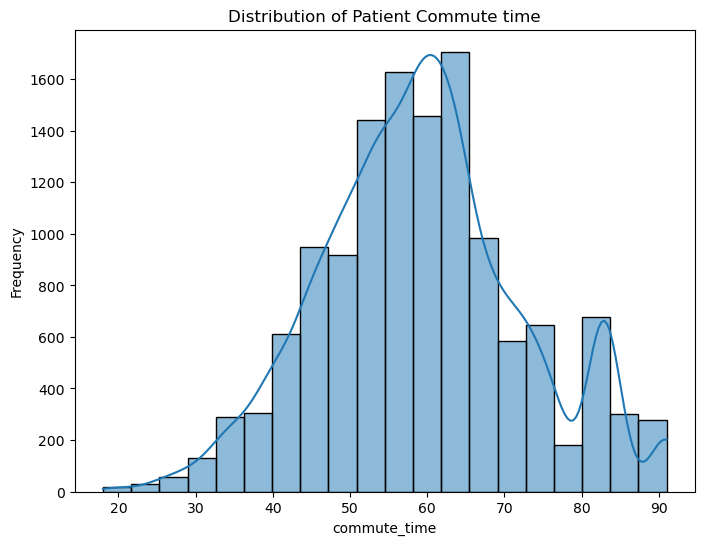

In [53]:
#histogram to show patient's commute_time
plt.figure(figsize=(8, 6))
sns.histplot(train_cols['patient_age'], bins=20, kde=True)
plt.title('Distribution of Patient Commute time')
plt.xlabel('commute_time')
plt.ylabel('Frequency')
plt.show()

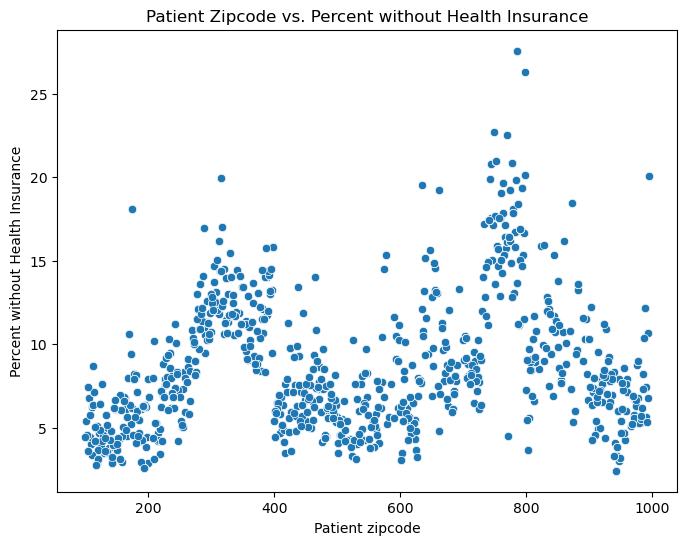

In [55]:
# Scatter plot of patient zipcode vs. percent without health insurance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='patient_zip3', y='health_uninsured', data=train_cols)
plt.title('Patient Zipcode vs. Percent without Health Insurance')
plt.xlabel('Patient zipcode')
plt.ylabel('Percent without Health Insurance')
plt.show()
#higher as you move farther

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


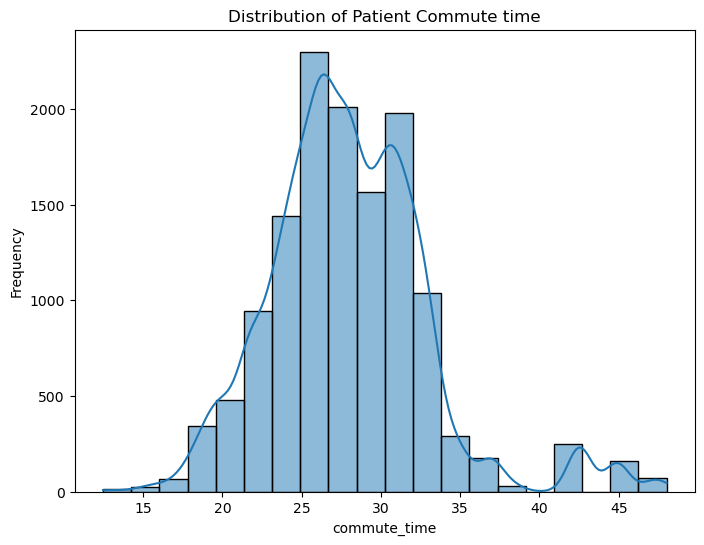

In [57]:
#histogram to show patient's commute_time
plt.figure(figsize=(8, 6))
sns.histplot(train_cols['commute_time'], bins=20, kde=True)
plt.title('Distribution of Patient Commute time')
plt.xlabel('commute_time')
plt.ylabel('Frequency')
plt.show()

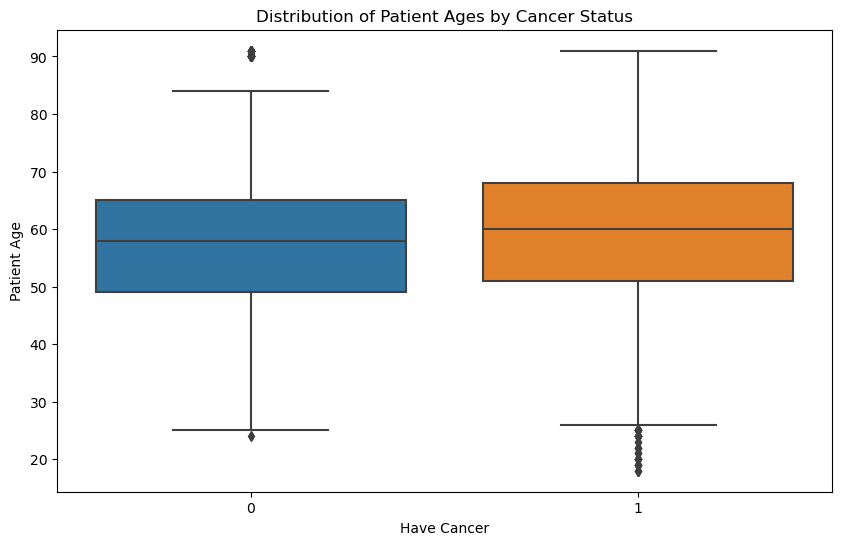

In [59]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

train_cols2 = train_cols
train_cols2['Target_time_achived'] = np.where(train_cols2['metastatic_diagnosis_period'] > 91,0,1)
# Create a box plot to show the distribution of patient ages based on whether they have cancer or not
sns.boxplot(x='Target_time_achived', y='patient_age', data=train_cols2)

# Set labels and title
plt.xlabel('Have Cancer')
plt.ylabel('Patient Age')
plt.title('Distribution of Patient Ages by Cancer Status')

# Show the plot
plt.show()
#people with it, average age is 57 years; min 30
#If the median age of patients with cancer is notably higher or lower 
#than the median age of patients without cancer, it suggests a potential association between age and cancer incidence.
#so no association between age and occurrence

#If there are outliers in one group but not the other, it could indicate differences in age distribution 
#between patients with and without cancer.
#so here there is age distribution difference between patients with and without cancer.

In [61]:
print(test_cols.shape)
print(train_cols.shape)

(5646, 284)
(13173, 297)


In [63]:
y_train=train_cols['metastatic_diagnosis_period']
x_train= train_cols.drop('metastatic_diagnosis_period', axis=1)
x_test = test_cols

In [65]:
drop_extra_test_cols = set(test_cols.columns) - set(train_cols.columns)
drop_extra_train_cols= set(train_cols.columns) - set(test_cols.columns)

In [67]:
train_cols.drop(columns=drop_extra_train_cols, inplace=True)
test_cols.drop(columns=drop_extra_test_cols, inplace=True)

In [69]:
#use PCA to reduce dimensionality
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_train= train_cols
x_test = test_cols

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [70]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [73]:
#lets do the test train split
from sklearn.model_selection import train_test_split
X_train2,X_validate,y_train2,y_validate = train_test_split(X_train_pca,y_train,test_size= 0.2, random_state = 42)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred = lr_model.predict(X_validate)

# Calculate mean squared error
lr_mse = mean_squared_error(y_validate, y_pred)

print("Linear Regression RMSE:", lr_mse)

#RMSE is quite high; let's try random forest

Linear Regression RMSE: 12162.389876328614


In [77]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred_rf = rf_model.predict(X_validate)

# Calculate RMSE
rmse_rf = mean_squared_error(y_validate, y_pred_rf, squared=False)

print("Random Forest Train RMSE:", rmse_rf)


# Make predictions on the testing data
y_pred_rf2 = rf_model.predict(X_test_pca)

#wow!!quite an improvement.

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Train RMSE: 120.53596755282008


In [79]:
#round to nearest full day
y_pred_rf2= y_pred_rf2.round()

In [83]:
output = soln.copy()

In [87]:
output.metastatic_diagnosis_period= y_pred_rf2
output.to_csv('wids_submission.csv', index=False)